
# Project: movie dataset analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



in this project , we will apply data analysis processes through a **movie dataset** that contains information about 10,000 movies.
       <br> 
       
   ### attributes description:
   <br>
   
   
   **id** : id of the movie                   
   **imdb_id** : id of the movie in imdb website             
   **popularity** : popularity of the movie        
   **budget** : Money spent on film production                 
   **revenue**  : movie earnings             
   **original_title** :movie title        
   **cast** : the group of actors who make up a film                 
   **homepage** : url for movie website              
   **director** :movie manager             
   **tagline** :sentence that describe the movie               
   **keywords** :some words to describe the movie              
   **overview** : describe the story of the movie            
   **runtime** :movie duration (minutes)             
   **genres** : a set of genres that the movie support(action,comedy,...)                
   **production_companies** :The companies involved in the production of the movie   
   **release_date** : release date           
   **vote_count** : number of votes           
   **vote_average** : vote average        
   **release_year** : release year           
   **budget_adj**  :budget of the associated movie in terms of 2010 dollars          
   **revenue_adj** :revenue of the associated movie in terms of 2010 dollars          
          
>here some question must be answered in this project
>##### 1- which genre that has highest vote_average?
>##### 2- how the revenue affected by runtime , vote average and release year?
>##### 3- do movies with long runtime get higher vote average than short runtime ?
>
> 

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("tmdb-movies.csv")

<a id='wrangling'></a>
## Data Wrangling

>  lets take a brief picture about the data set



In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>as you see, there are some columns thats missing data. now lets drop all unnecessary columns


In [97]:
df.drop(['cast','homepage','tagline','keywords','production_companies','director'],axis=1,inplace=True)


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   overview        10862 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
 13  budget_adj      10866 non-null  float64
 14  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.2+ MB


>as you see, there are some columns that have little number of missing values , so we can drop rows with missing columns since that will not make an effect in our analysis

In [99]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10833 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10833 non-null  int64  
 1   imdb_id         10833 non-null  object 
 2   popularity      10833 non-null  float64
 3   budget          10833 non-null  int64  
 4   revenue         10833 non-null  int64  
 5   original_title  10833 non-null  object 
 6   overview        10833 non-null  object 
 7   runtime         10833 non-null  int64  
 8   genres          10833 non-null  object 
 9   release_date    10833 non-null  object 
 10  vote_count      10833 non-null  int64  
 11  vote_average    10833 non-null  float64
 12  release_year    10833 non-null  int64  
 13  budget_adj      10833 non-null  float64
 14  revenue_adj     10833 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


>now let's check whether there are duplicate rows

In [100]:
sum(df.duplicated())

1

In [101]:
df.drop_duplicates(); # drop the duplicated row


>before moving to the next section, we found that "genres" has multiple values. we need to solve this problem in order to answer **Question 1**. so lets look at the number of rows with multiple genres 

In [102]:
df[df['genres'].str.contains("|")].shape[0]

10833

>it's a huge number!!. saperate the genres into multiple row will make our analysis unrealistic. we can solve this problem in other way (seen in next section)

<a id='eda'></a>
## Exploratory Data Analysis

> in this section .question asked above will be answered by exploring and visualising data. now lets define a function for displaying the barchart.


In [103]:
def bar_chart (labels , values , title , x_title , y_title,Figsize=(50, 15)):
    plt.figure(figsize=Figsize);
    plt.bar( labels , values ,width = 0.4,align='center');
    plt.title( title ,fontsize = 30);
    plt.xlabel(x_title,fontsize = 25,color="red");
    plt.ylabel(y_title,fontsize = 25,color="red");
    plt.rc('xtick', labelsize=22) ;
    plt.rc('ytick', labelsize=22) ;
    
    
    
    

## 1- which genre that has highest vote_average?

In [104]:
genres =[]


for i in df["genres"]:    # put all genres in a list
    genres+=i.split('|')
    

genres = list(set(genres))    #to make the values unique

In [105]:
vote_average_values= {}

for i in genres:
    vote_average_values[i] =df[df["genres"].str.contains(i)]["vote_average"].mean()  #each genre with its vote_average mean putted in vote_average_values 

    
vote_average_values
    

{'Comedy': 5.905354787654967,
 'Mystery': 5.946790123456786,
 'Drama': 6.164887581424676,
 'Western': 6.083030303030303,
 'Thriller': 5.750412654745533,
 'Fantasy': 5.860131434830236,
 'Documentary': 6.907321772639695,
 'Foreign': 5.9813829787234045,
 'Music': 6.478325123152701,
 'Romance': 6.043366452367037,
 'Adventure': 5.938938053097356,
 'History': 6.410479041916166,
 'Action': 5.784831932773117,
 'Horror': 5.337446548564444,
 'TV Movie': 5.788023952095813,
 'Crime': 6.124059040590415,
 'Science Fiction': 5.6593469387755135,
 'Family': 5.996504065040662,
 'War': 6.297777777777776,
 'Animation': 6.402439024390253}

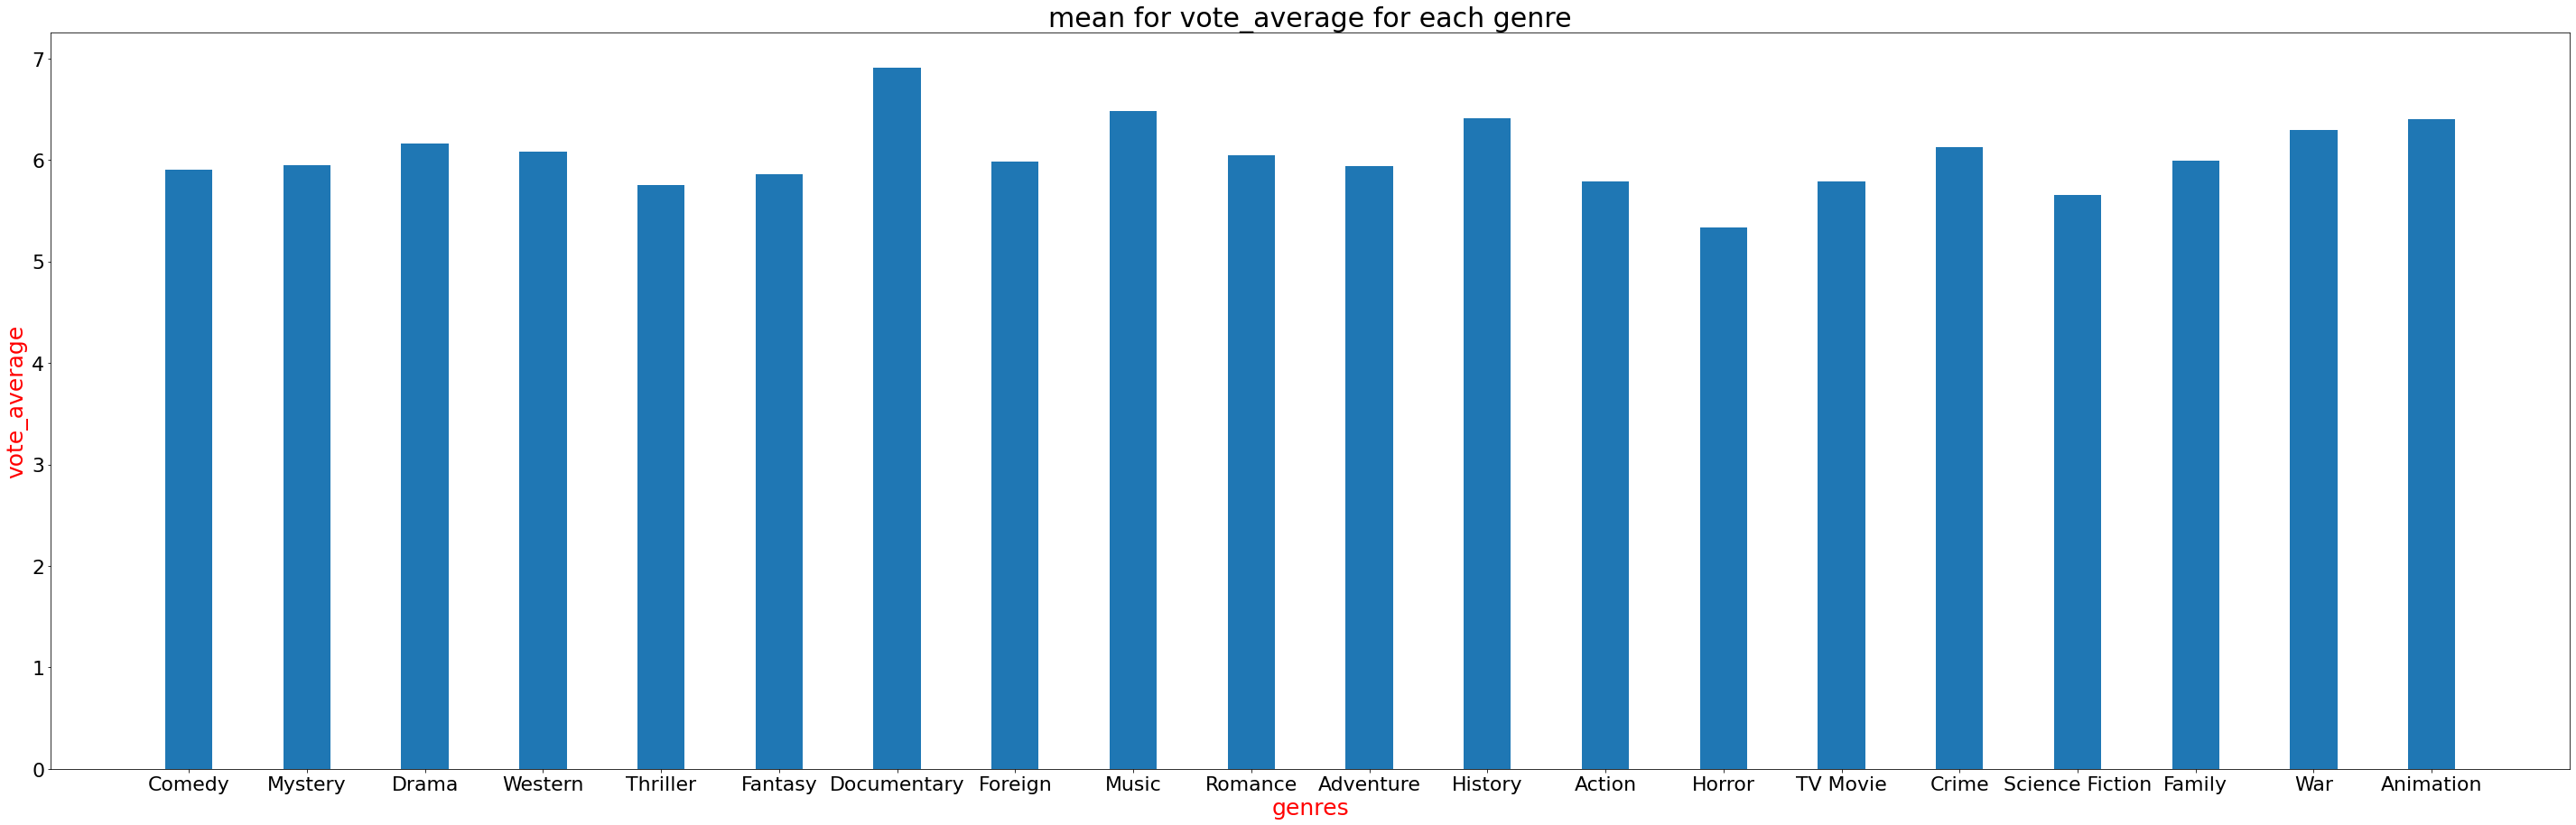

In [106]:
bar_chart(vote_average_values.keys(),vote_average_values.values() ,"mean for vote_average for each genre" ,"genres","vote_average")






>based on the barChar above, Documentary movies have a highest vote average

----------------------------------------------------------------------------------------------------------------

## 2- how the revenue affected by runtime , vote average and release year?

to solve this question, we need to use scatter plot since scatter is very useful to identify the relationship between columns

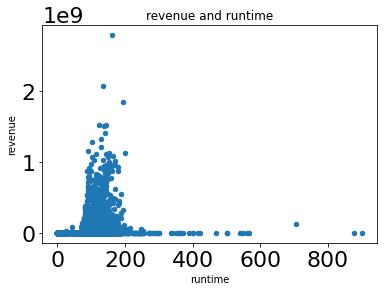

In [107]:
df.plot(y='revenue', x= "runtime", kind = 'scatter',title="revenue and runtime");




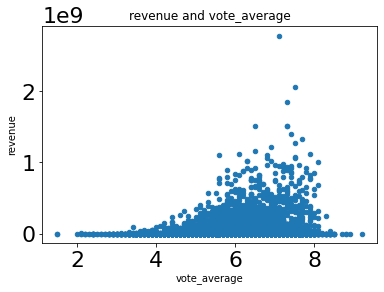

In [108]:
df.plot(y='revenue', x= "vote_average", kind = 'scatter',title="revenue and vote_average");

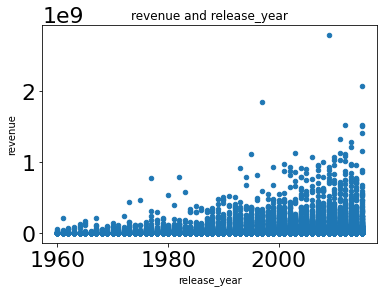

In [109]:
df.plot(y='revenue', x= "release_year", kind = 'scatter',title="revenue and release_year");

### based on the scatters above :
    
    1- movies with runtime between 30 and 200 minutes gets more revenue . otherwise the movies gets low revenue
    
    2- movies with high vote average gets more revenue . 
    
    3- year after year, movies gets more revenue . as you note, Modern movies gets more revenue

## 3- do movies with long runtime get higher vote average than short runtime ?

In [110]:
mean =df["runtime"].mean()
df_long_time  = df[df["runtime"]>mean]   # gets rows with runtime above the mean 
df_short_time = df[df["runtime"]<=mean]  # gets rows with runtime below the mean

print(df_long_time.runtime.mean())
print(df_short_time.runtime.mean())

122.8123595505618
87.78129406235313


as you see, movies with long runtime gets higher vote average. now let's visualize it in bar chart

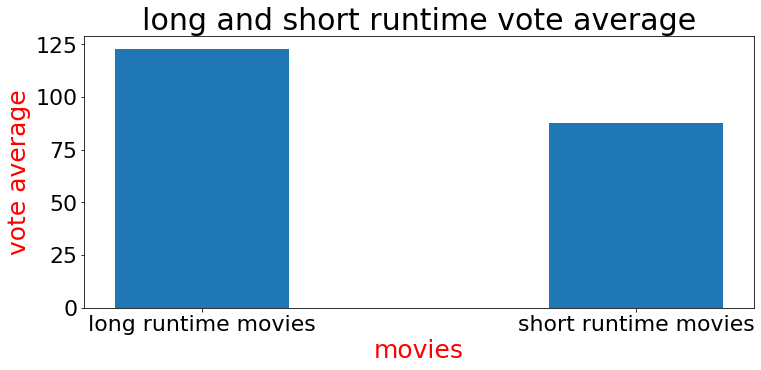

In [111]:
labels=["long runtime movies","short runtime movies"]
values=[df_long_time.runtime.mean(),df_short_time.runtime.mean()]
title="long and short runtime vote average"
x_title="movies"
y_title="vote average"

bar_chart( labels, values , title , x_title , y_title,Figsize=(12,5))

<a id='conclusions'></a>
## Conclusions



>### let's remember the questions that we posed:
<br>
<br>

>#### 1- which genre that has highest vote_average?
>we faced some limitation in this question because of the multi value of "genres" feature . however, we saw that Documentary movies have the highest average vote
<br>
<br>

>#### 2- how the revenue affected by runtime , vote average and release year?
>based on our analysis, we conclude that 
 movies with runtime between 30 and 200 minutes gets more revenue . otherwise the movies gets low revenue.
 movies with high vote average gets more revenue . 
  Modern movies gets more revenue than the old movies



>####  3- do movies with long runtime get higher vote average than short runtime ?
>based on our analysis, we conclude that movies with long duration mostly gets more revenue than movies with short duration

>###  Limitations
> data provided by the dataset is clear and  sufficient to apply data analysis processes , but there are some Limitations i faced during the analysis:

>1- an ambiguity to understand the meaning of "popularity" . since the are two possible definition:<br>
-number of viewes <br>
-popularity in general <br>
since the first definition is closer, so i assumed that number of views define the popularity
<br>
<br>
2- huge number of null values ,Which forced to delete the some columns instead of the rows

>3- the multivalue attribute "genres". since there are 10833 rows that have more than one genres. so we cannot seperate the genres into multble row because The number of rows will be doubled , that will make our analysis unrealistic.